In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

In [2]:
df = pd.read_csv('NvidiaStockPrice.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-1999,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,25-01-1999,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,26-01-1999,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,27-01-1999,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,28-01-1999,0.041667,0.041927,0.041276,0.041536,0.038098,227520000
5,29-01-1999,0.041536,0.041667,0.039583,0.039583,0.036307,244032000
6,01-02-1999,0.039583,0.040625,0.039583,0.040365,0.037024,154704000
7,02-02-1999,0.039583,0.040625,0.036068,0.037240,0.034158,264096000
8,03-02-1999,0.036719,0.038542,0.036458,0.038021,0.034874,75120000
9,04-02-1999,0.038542,0.041146,0.038021,0.040104,0.036784,181920000


In [3]:
#Data Cleaning

for i in df.columns:
    if df[i].isnull().any():
        print("The dataframe contains null values")
    else:
        pass

The dataset that we are dealing with here does not contain any NULL values.

Text(0.5, 1.0, 'Variation in opening,closing and highest value of stock over the years (1990-2024)')

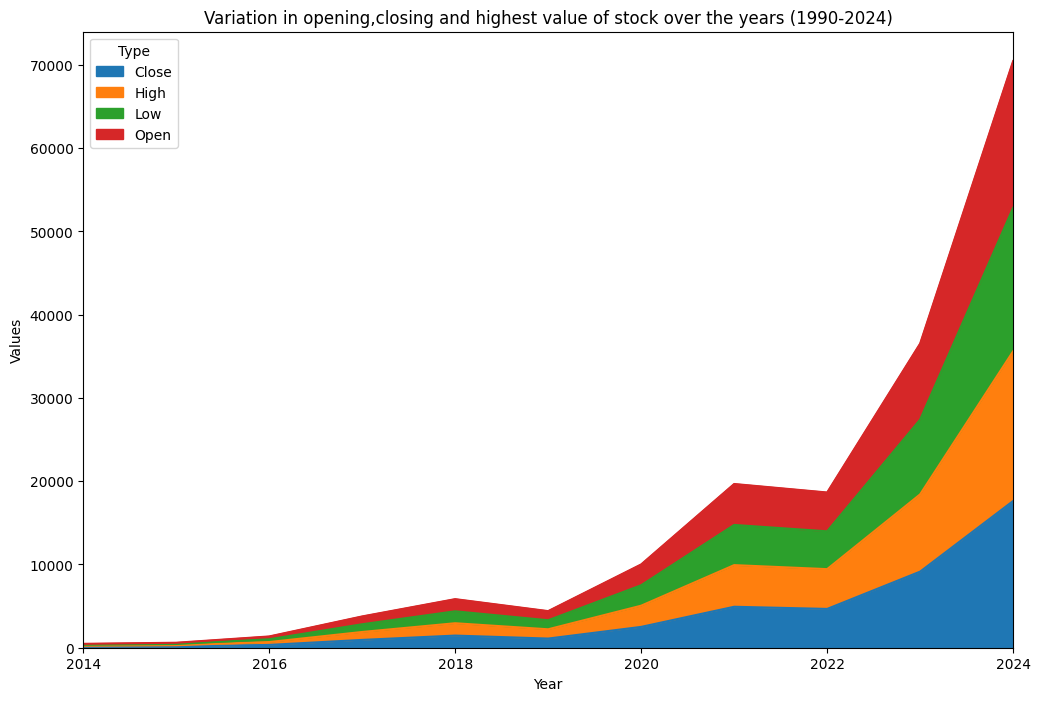

In [81]:
df['year'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.year

df_yearly = df.groupby('year').agg({
    'Open': 'sum',
    'High': 'sum',
    'Low': 'sum',
    'Close': 'sum',
    'Adj Close': 'sum'
}).reset_index()

#Melting the dataframe in order to get a simpler view of the dataframe.


df_melted = df_yearly.melt(id_vars=['year'], value_vars=['Open','High','Low','Close'], 
                           var_name='Type', value_name='Value')
df_pivot = df_melted.pivot_table(index='year', columns='Type', values='Value')
df_pivot.plot.area(figsize=(12, 8))
plt.xlim(2014,2024)

plt.ylabel('Values')
plt.xlabel('Year')
plt.title('Variation in opening,closing and highest value of stock over the years (1990-2024)')

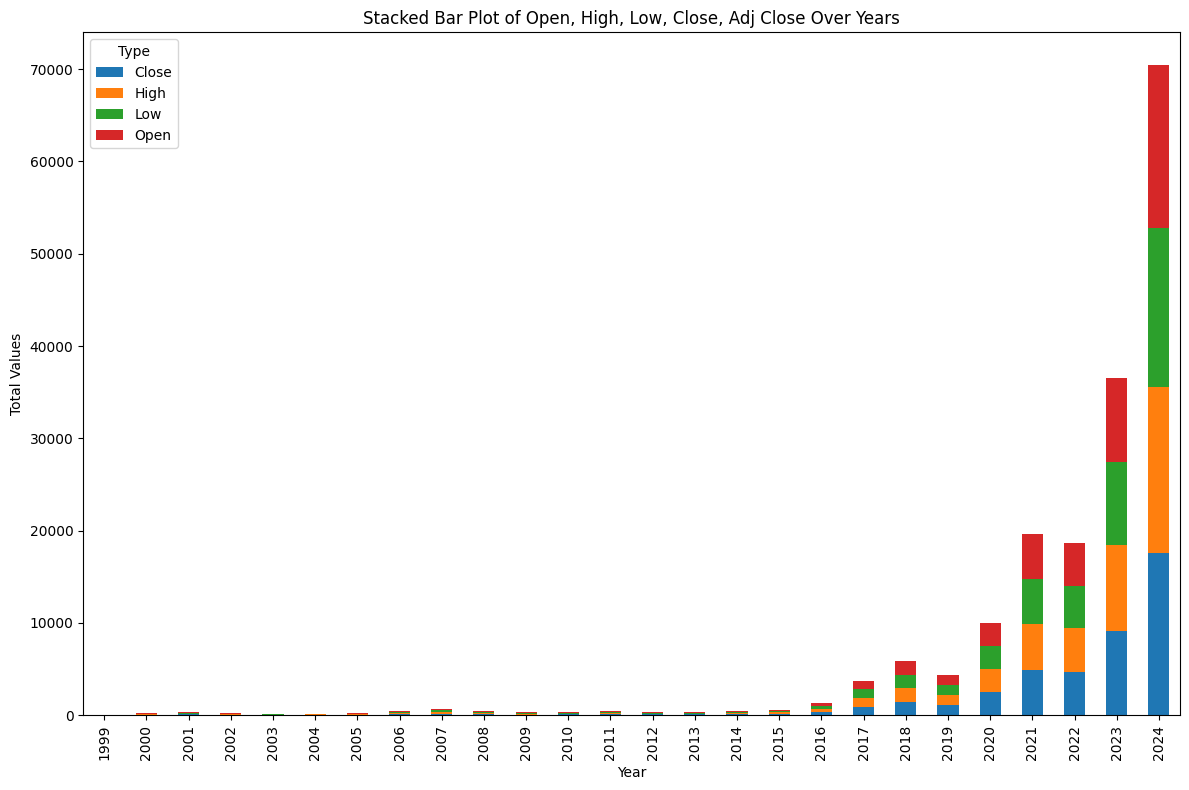

In [83]:
df_pivot.plot.bar(stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Total Values')
plt.title('Stacked Bar Plot of Open, High, Low, Close, Adj Close Over Years')
plt.tight_layout()
plt.show()